In [149]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer ,ENGLISH_STOP_WORDS


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report


In [150]:
train = pd.read_csv('./tweet_emotions.csv')
train.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [152]:
train['sentiment'].value_counts( )

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [153]:
train = train[train.sentiment != 'anger'] #& 'boredom' & 'enthusiasm' & 'empty'
train = train[train.sentiment != 'boredom']
train = train[train.sentiment != 'enthusiasm']
train = train[train.sentiment != 'empty']
train = train[train.sentiment != 'hate']

train = train[train.sentiment != 'relief']

train = train[train.sentiment != 'fun']
train = train[train.sentiment != 'surprise']
train = train[train.sentiment != 'love']
train = train[train.sentiment != 'sadness']



train = train[train.sentiment != 'sentiment']
train.head()

,tweet_id,sentiment,content
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
10,1956969456,neutral,cant fall asleep
11,1956969531,worry,Choked on her retainers


In [154]:
label_dict = {'neutral':0, 'worry':1, 'happiness':2}
train['label'] = train['sentiment'].map(label_dict )
train.head()

,tweet_id,sentiment,content,label
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,0
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,1
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,1
10,1956969456,neutral,cant fall asleep,0
11,1956969531,worry,Choked on her retainers,1


In [155]:
train.drop(['sentiment','tweet_id'],axis=1 , inplace = True)
train.head()

,content,label
4,@dannycastillo We want to trade with someone w...,0
5,Re-pinging @ghostridah14: why didn't you go to...,1
7,Hmmm. http://www.djhero.com/ is down,1
10,cant fall asleep,0
11,Choked on her retainers,1


In [156]:
train['content']=train['content'].str.lower()
train['content'].head()

4     @dannycastillo we want to trade with someone w...
5     re-pinging @ghostridah14: why didn't you go to...
7                  hmmm. http://www.djhero.com/ is down
10                                     cant fall asleep
11                              choked on her retainers
Name: content, dtype: object

In [157]:
import re
def cleaning_tags(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ", text).split())

train['content'] = train['content'].apply(lambda x: cleaning_tags(x))
train['content'].head()

4     we want to trade with someone who has houston ...
5     re-pinging : why didn't you go to prom? bc my ...
7                                         hmmm. is down
10                                     cant fall asleep
11                              choked on her retainers
Name: content, dtype: object

In [158]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
train['content']= train['content'].apply(lambda x: cleaning_punctuations(x))
train['content'].head()

4     we want to trade with someone who has houston ...
5     repinging  why didnt you go to prom bc my bf d...
7                                          hmmm is down
10                                     cant fall asleep
11                              choked on her retainers
Name: content, dtype: object

In [159]:
def cleaning_repeating_char(text):
    return re.sub(r'([a-z])\1+', r'\1', text)
train['content'] = train['content'].apply(lambda x: cleaning_repeating_char(x))
train['content'].head()

4     we want to trade with someone who has houston ...
5     repinging  why didnt you go to prom bc my bf d...
7                                            hm is down
10                                       cant fal aslep
11                              choked on her retainers
Name: content, dtype: object

In [160]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
train['content'] = train['content'].apply(lambda x: cleaning_URLs(x))
train['content'].head()

4     we want to trade with someone who has houston ...
5     repinging  why didnt you go to prom bc my bf d...
7                                            hm is down
10                                       cant fal aslep
11                              choked on her retainers
Name: content, dtype: object

In [161]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
train['content'] = train['content'].apply(lambda x: cleaning_numbers(x))
train['content'].head()

4     we want to trade with someone who has houston ...
5     repinging  why didnt you go to prom bc my bf d...
7                                            hm is down
10                                       cant fal aslep
11                              choked on her retainers
Name: content, dtype: object

In [162]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
train['content'] = train['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
train.head()

[nltk_data] Downloading package stopwords to /home/paula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,label
4,want trade someone houston tickets one wil,0
5,repinging didnt go prom bc bf didnt like friends,1
7,hm,1
10,cant fal aslep,0
11,choked retainers,1


In [163]:
from spellchecker import SpellChecker
spell = SpellChecker(distance=1)
def Correct(x):
    return spell.correction(x)
train['content'] = train['content'].apply(Correct)
train.head()

,content,label
4,want trade someone houston tickets one wil,0
5,repinging didnt go prom bc bf didnt like friends,1
7,hm,1
10,cant fal aslep,0
11,choked retainers,1


In [164]:
import pandas as pd
import nltk
#nltk.download('punkt')

train['content'] = train.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)
train.head()

,content,label
4,"[want, trade, someone, houston, tickets, one, ...",0
5,"[repinging, didnt, go, prom, bc, bf, didnt, li...",1
7,[hm],1
10,"[cant, fal, aslep]",0
11,"[choked, retainers]",1


In [166]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
train['content']= train['content'].apply(lambda x: stemming_on_text(x))
train['content'].head()

4     [want, trade, someone, houston, tickets, one, ...
5     [repinging, didnt, go, prom, bc, bf, didnt, li...
7                                                  [hm]
10                                   [cant, fal, aslep]
11                                  [choked, retainers]
Name: content, dtype: object

In [167]:
lm = nltk.WordNetLemmatizer()
nltk.download('wordnet')
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
train['content'] = train['content'].apply(lambda x: lemmatizer_on_text(x))
train['content'].head()

[nltk_data] Downloading package wordnet to /home/paula/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


4     [want, trade, someone, houston, tickets, one, ...
5     [repinging, didnt, go, prom, bc, bf, didnt, li...
7                                                  [hm]
10                                   [cant, fal, aslep]
11                                  [choked, retainers]
Name: content, dtype: object

In [168]:
def join_back(list_input):
    return " ".join(list_input)
    

train['content']=train['content'].apply(join_back)
train.head()

,content,label
4,want trade someone houston tickets one wil,0
5,repinging didnt go prom bc bf didnt like friends,1
7,hm,1
10,cant fal aslep,0
11,choked retainers,1


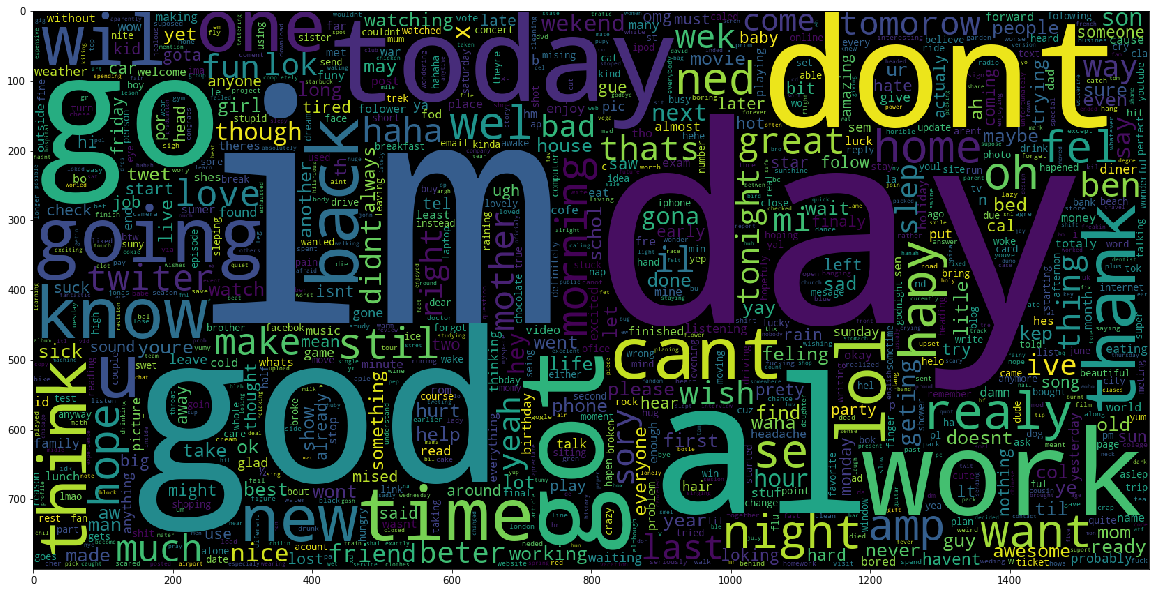

In [72]:
data_pos = train['content']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [169]:
X=train['content']
y=train.label
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3) 

In [114]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  92387


In [115]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6000)

In [171]:
X_train = cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [172]:
pac=PassiveAggressiveClassifier(max_iter=70)
pac.fit(X_train,y_train)

PassiveAggressiveClassifier(max_iter=70)

In [173]:
y_pred=pac.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 50.01%


In [174]:
log_reg = LogisticRegression(max_iter=50).fit(X_train, y_train)


/home/paula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [175]:
y_pred=pac.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 50.01%


In [58]:
log_reg = LogisticRegression(max_iter=50).fit(X_train, y_train)


/home/paula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [86]:
y_predicted = log_reg.predict(X_test)
score=accuracy_score(y_test,y_predicted)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 55.84%


In [177]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100,learning_rate=0.2)


In [178]:
model.fit(X_train, y_train)


[12:59:28] WARNING: /workspace/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [179]:
y_pred = model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 55.99%
